##### class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
###### 使用k-means++的方法选择初始质心，使质心尽量远离，效果比随机选的好references:http://blog.csdn.net/loadstar_kun/article/details/39450615

##### This example is meant to illustrate situations where k-means will produce unintuitive and possibly unexpected clusters. In the first three plots, the input data does not conform to some implicit assumption that k-means makes and undesirable clusters are produced as a result. In the last plot, k-means returns intuitive clusters despite unevenly sized blobs.

In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
make_blobs = datasets.make_blobs
#make_blobs是sklearn内置的形成聚类数据的方法
#sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

In [3]:
n_samples = 1500
random_state = 170
X , y = make_blobs(n_samples=n_samples,random_state=random_state)

In [4]:
X

array([[ -5.19811282e+00,   6.41869316e-01],
       [ -5.75229538e+00,   4.18627111e-01],
       [ -1.08448984e+01,  -7.55352273e+00],
       ..., 
       [  1.36105255e+00,  -9.07491863e-01],
       [ -3.54141108e-01,   7.12241630e-01],
       [  1.88577252e+00,   1.41185693e-03]])

In [68]:
X[y==0].shape

(500, 2)

In [42]:
X.shape

(1500, 2)

In [67]:
y

array([1, 1, 0, ..., 2, 2, 2])

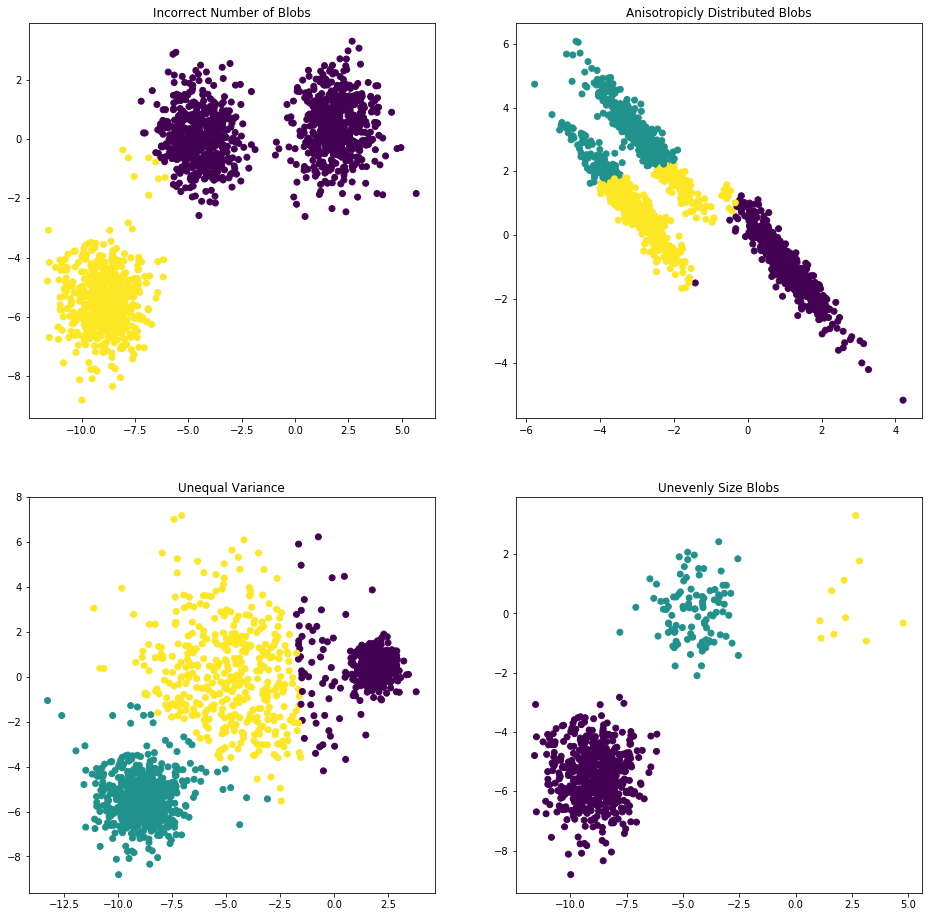

In [69]:
plt.figure(figsize=(16,16))
#Incorrect number of clusters
y_pred = KMeans(n_clusters=2,random_state=random_state).fit_predict(X)
plt.subplot(221)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.title('Incorrect Number of Blobs')

#Anisotropicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X,transformation)#np.dot 两个矩阵相乘
y_pred = KMeans(n_clusters=3,random_state=random_state).fit_predict(X_aniso)
plt.subplot(222)
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y_pred)
plt.title('Anisotropicly Distributed Blobs')

#Different variance
X_varied,y_varied = make_blobs(n_samples=n_samples,cluster_std=[1.0,2.5,0.5],random_state=random_state)
y_pred = KMeans(n_clusters=3,random_state=random_state).fit_predict(X_varied)
plt.subplot(223)
plt.scatter(X_varied[:,0],X_varied[:,1],c=y_pred)
plt.title('Unequal Variance')

#Unevenly sized blobs
X_filtered = np.vstack((X[y==0][:500],X[y==1][:100],X[y==2][:10]))#np.vstack 合并两个矩阵
y_pred = KMeans(n_clusters=3,random_state=random_state).fit_predict(X_filtered)
plt.subplot(224)
plt.scatter(X_filtered[:,0],X_filtered[:,1],c=y_pred)
plt.title('Unevenly Size Blobs')